<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Range_Sum_Query_Mutable_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Range Sum Query - Mutable

Given an integer array nums, handle multiple queries of the following types:

- Update the value of an element in nums.
- Calculate the sum of the elements of nums between indices left and right inclusive where left <= right.

Implement the NumArray class:

- NumArray(int[] nums) Initializes the object with the integer array nums.
- void update(int index, int val) Updates the value of nums[index] to be val.
- int sumRange(int left, int right) Returns the sum of the elements of nums between indices left and right inclusive (i.e. nums[left] + nums[left + 1] + ... + nums[right]).

Example 1:

```
Input
["NumArray", "sumRange", "update", "sumRange"]
[[[1, 3, 5]], [0, 2], [1, 2], [0, 2]]
Output
[null, 9, null, 8]

Explanation
NumArray numArray = new NumArray([1, 3, 5]);
numArray.sumRange(0, 2); // return 1 + 3 + 5 = 9
numArray.update(1, 2);   // nums = [1, 2, 5]
numArray.sumRange(0, 2); // return 1 + 2 + 5 = 8
```



Constraints:

```
1 <= nums.length <= 3 * 104
-100 <= nums[i] <= 100
0 <= index < nums.length
-100 <= val <= 100
0 <= left <= right < nums.length
At most 3 * 104 calls will be made to update and sumRange.
```



# Solution 1: Naive

In [1]:
class NumArray:

    # Time = O(N)
    # Space = O(N)
    def __init__(self, nums):
        self.nums = nums
        self.total =sum(self.nums)

    # Time = O(1)
    # Space = O(1)
    def update(self, index: int, val: int) -> None:
        n = self.nums[index] 
        self.nums[index] = val
        self.total = self.total - n + val
          
    # Time = O(N)
    # Space = O(1)
    def sumRange(self, left: int, right: int) -> int:
        n1 = sum(self.nums[0:left])
        n2 = sum(self.nums[right+1:])
        return  self.total -n1-n2

In [2]:
num_array = NumArray([1, 3, 5])
num_array.nums

[1, 3, 5]

In [3]:
num_array.update(1, 2)

In [4]:
num_array.sumRange(0, 2)

8

# Solution 2: Segment Tree

In [5]:
class NumArray(object):

    # Time = O(N)
    # Space = O(N)
    def __init__(self, nums):
        self.l = len(nums)
        self.tree = [0]*self.l + nums
        for i in range(self.l - 1, 0, -1):
            self.tree[i] = self.tree[2*i] + self.tree[(2*i)+1]
    
    # Time = O(log n)
    # Space = O(1)
    def update(self, i, val):
        n = self.l + i
        self.tree[n] = val
        while n > 0:
            m = n + 1 if n % 2 == 0 else n - 1
            self.tree[n//2] = self.tree[n] + self.tree[m]
            n //= 2

    # Time = O(log n)
    # Space = O(1)
    def sumRange(self, i, j):
        m = self.l + i
        n = self.l + j
        res = 0
        while m <= n:
          if m % 2 == 1:
              res += self.tree[m]
              m += 1
          m //= 2
          if n % 2 == 0:
              res += self.tree[n]
              n -= 1
          n //= 2

        return res

In [6]:
num_array = NumArray([1, 3, 5])

In [7]:
num_array.tree

[0, 9, 8, 1, 3, 5]

In [8]:
num_array.update(1, 2)

In [9]:
num_array.sumRange(0, 2)

8

## Conceptual Note

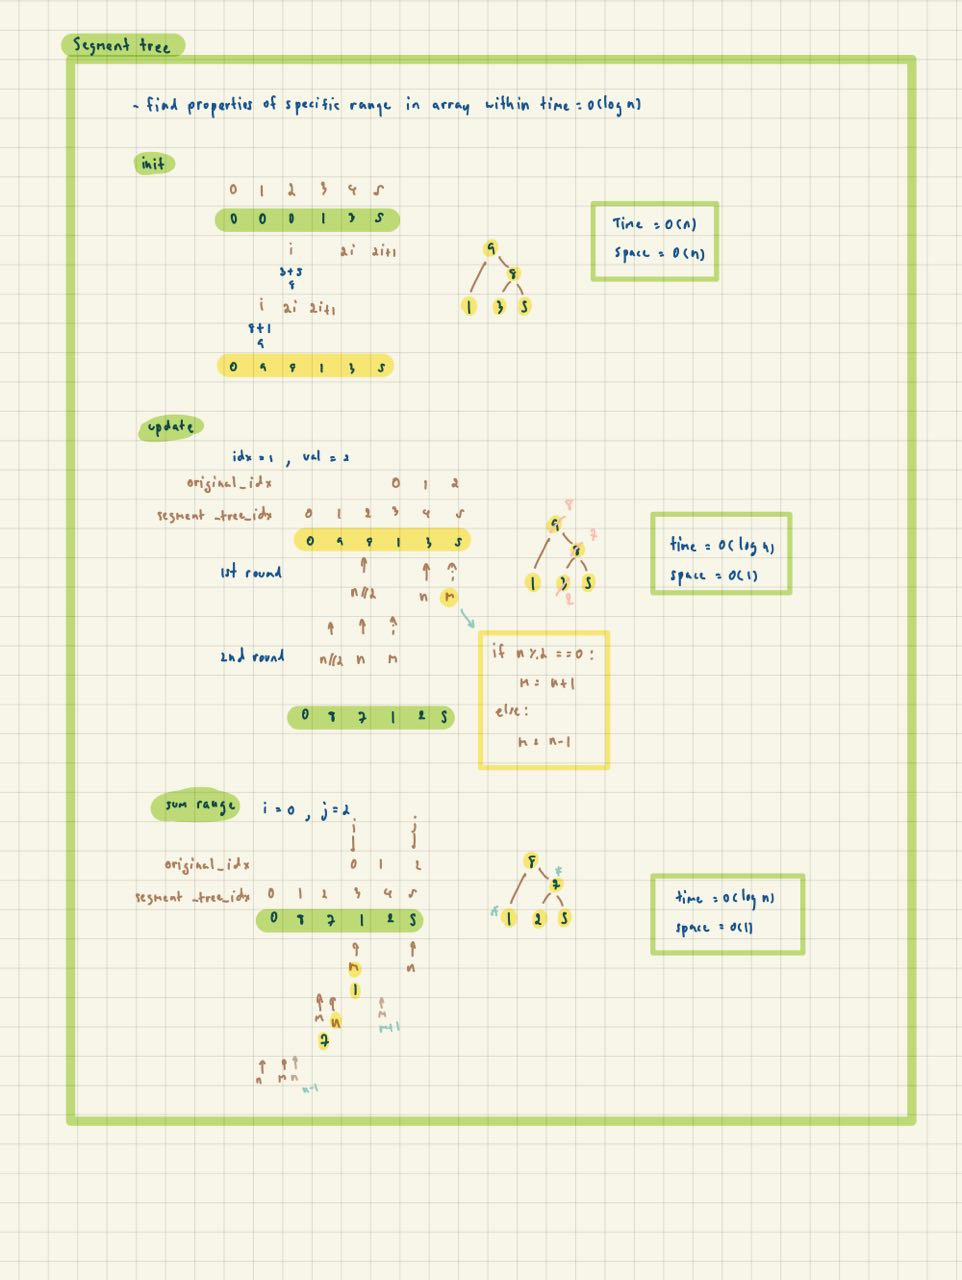